In [1]:
%matplotlib inline
import pandas as pd
import re
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from scipy import stats

import numpy as np
import lars_demo
import movie_data_2020
import movie_data_2019
import movie_data_2018

In [2]:
boxoffice_2018 = movie_data_2018.return_dicts()
bdf = pd.DataFrame.from_dict(boxoffice_2018)
bdf

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
0,Black Panther,700059566,134.0,PG-13,0
1,Avengers: Infinity War,678815482,149.0,PG-13,0
2,Incredibles 2,608581744,118.0,PG,0
3,Jurassic World: Fallen Kingdom,417719760,128.0,PG-13,170000000
4,Deadpool 2,318491426,119.0,R,110000000
...,...,...,...,...,...
903,The Long Dumb Road,4667,90.0,R,0
904,Kangaroo,4547,103.0,None,0
905,Kickboxer: Retaliation,4537,110.0,R,0
906,Never Look Away,1304042,189.0,R,0


In [3]:
metascores_2018 = movie_data_2018.return_2018()

mdf = pd.DataFrame.from_dict(metascores_2018)
mdf
bdf['metascores'] = mdf['metascores']
bdf['audience_scores'] = mdf['audience_scores']
bdf['critic_count'] = mdf['critic_count']
bdf['num_audience_ratings'] = mdf['num_audience_ratings']
bdf['metascores'] = bdf['metascores'].str.extract('(\d+)').astype(float)
bdf['critic_count'] = bdf['critic_count'].str.extract('(\d+)').astype(float)
bdf['num_audience_ratings'] = bdf['num_audience_ratings'].str.extract('(\d+)').astype(float)
bdf['budget'] = bdf['budget'].astype(float)
bdf['domestic_total_gross'] = bdf['domestic_total_gross'].astype(float)
bdf = pd.get_dummies(bdf, columns=['rating'])
bdf

,movie_title,domestic_total_gross,runtime_minutes,budget,metascores,audience_scores,critic_count,num_audience_ratings,rating_G,rating_M/PG,rating_PG,rating_PG-13,rating_R
0,Black Panther,700059566.0,134.0,0.0,NaN,No score,NaN,NaN,0,0,0,1,0
1,Avengers: Infinity War,678815482.0,149.0,0.0,NaN,No score,NaN,NaN,0,0,0,1,0
2,Incredibles 2,608581744.0,118.0,0.0,NaN,No score,NaN,NaN,0,0,1,0,0
3,Jurassic World: Fallen Kingdom,417719760.0,128.0,170000000.0,NaN,No score,NaN,NaN,0,0,0,1,0
4,Deadpool 2,318491426.0,119.0,110000000.0,NaN,No score,NaN,NaN,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,The Long Dumb Road,4667.0,90.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,1
904,Kangaroo,4547.0,103.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0
905,Kickboxer: Retaliation,4537.0,110.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,1
906,Never Look Away,1304042.0,189.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0,1


In [4]:
boxoffice_2019 = movie_data_2019.return_dicts()
bdf1 = pd.DataFrame.from_dict(boxoffice_2019)
bdf1
metascores_2019 = movie_data_2019.return_2019()
mdf1 = pd.DataFrame.from_dict(metascores_2019)
mdf1
bdf1['metascores'] = mdf1['metascores']
bdf1['audience_scores'] = mdf1['audience_scores']
bdf1['critic_count'] = mdf1['critic_count']
bdf1['num_audience_ratings'] = mdf1['num_audience_ratings']
bdf1

,movie_title,domestic_total_gross,runtime_minutes,rating,budget,metascores,audience_scores,critic_count,num_audience_ratings
0,Avengers: Endgame,858373000,181.0,PG-13,356000000,78,7.8,based on 57 Critic Reviews,based on 4763 Ratings
1,The Lion King,543638043,118.0,PG,260000000,88,8.8,based on 30 Critic Reviews,based on 768 Ratings
2,Toy Story 4,434038008,100.0,G,200000000,84,8.0,based on 57 Critic Reviews,based on 691 Ratings
3,Frozen II,477373578,103.0,PG,150000000,64,6.9,based on 47 Critic Reviews,based on 458 Ratings
4,Captain Marvel,426829839,123.0,PG-13,160000000,64,3.5,based on 56 Critic Reviews,based on 5119 Ratings
...,...,...,...,...,...,...,...,...,...
903,In Safe Hands,1737,110.0,None,0,No score,No score,No critics,No ratings
904,Henchmen,1469,89.0,None,0,No score,No score,No critics,No ratings
905,1945,1006193,91.0,None,0,No score,No score,No critics,No ratings
906,Tall Tales from the Magical Garden of Antoon K...,220,88.0,PG,0,No score,No score,No critics,No ratings


In [5]:
boxoffice_2020 = movie_data_2020.return_dicts()
bdf2 = pd.DataFrame.from_dict(boxoffice_2020)
bdf2
metascores_2020 = movie_data_2020.return_2020()

mdf2 = pd.DataFrame.from_dict(metascores_2020)
mdf2
bdf2['metascores'] = mdf2['metascores']
bdf2['audience_scores'] = mdf2['audience_scores']
bdf2['critic_count'] = mdf2['critic_count']
bdf2['num_audience_ratings'] = mdf2['num_audience_ratings']
bdf2

,movie_title,domestic_total_gross,runtime_minutes,rating,budget,metascores,audience_scores,critic_count,num_audience_ratings
0,Bad Boys for Life,204417855,124.0,R,90000000,59,6.7,based on 46 Critic Reviews,based on 228 Ratings
1,1917,159227644,119.0,R,95000000,78,8.4,based on 57 Critic Reviews,based on 722 Ratings
2,Sonic the Hedgehog,146066470,99.0,PG,85000000,47,8.3,based on 42 Critic Reviews,based on 1097 Ratings
3,Jumanji: The Next Level,316831246,123.0,PG-13,125000000,58,6.4,based on 37 Critic Reviews,based on 263 Ratings
4,Star Wars: Episode IX,515202542,142.0,PG-13,275000000,53,4.7,based on 61 Critic Reviews,based on 4896 Ratings
...,...,...,...,...,...,...,...,...,...
255,I Do Not Care If We Go Down in History as Barb...,11307,140.0,None,0,NaN,NaN,NaN,NaN
256,The Load,28410,98.0,None,0,NaN,NaN,NaN,NaN
257,Asako I & II,25559,119.0,None,0,NaN,NaN,NaN,NaN
258,Chained for Life,17431,91.0,None,0,NaN,NaN,NaN,NaN


In [6]:
frames = [bdf, bdf1, bdf2]
bdf3 = pd.concat(frames)
bdf3.drop(columns=['rating'])

,movie_title,domestic_total_gross,runtime_minutes,budget,metascores,audience_scores,critic_count,num_audience_ratings,rating_G,rating_M/PG,rating_PG,rating_PG-13,rating_R
0,Black Panther,700059566.0,134.0,0.0,NaN,No score,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1,Avengers: Infinity War,678815482.0,149.0,0.0,NaN,No score,NaN,NaN,0.0,0.0,0.0,1.0,0.0
2,Incredibles 2,608581744.0,118.0,0.0,NaN,No score,NaN,NaN,0.0,0.0,1.0,0.0,0.0
3,Jurassic World: Fallen Kingdom,417719760.0,128.0,170000000.0,NaN,No score,NaN,NaN,0.0,0.0,0.0,1.0,0.0
4,Deadpool 2,318491426.0,119.0,110000000.0,NaN,No score,NaN,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,I Do Not Care If We Go Down in History as Barb...,11307.0,140.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,The Load,28410.0,98.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,Asako I & II,25559.0,119.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,Chained for Life,17431.0,91.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(bdf3.shape)
bdf4 = bdf3.fillna(0)
bdf4['audience_scores'] = bdf4['audience_scores'].str.extract('(\d+)').astype(float)
bdf4['metascores'] = bdf4['metascores'].str.extract('(\d+)').astype(float)
bdf4['critic_count'] = bdf4['critic_count'].str.extract('(\d+)').astype(float)
bdf4['num_audience_ratings'] = bdf4['num_audience_ratings'].str.extract('(\d+)').astype(float)
bdf4 = bdf4.fillna(0)
bdf4.set_index('movie_title')

(2076, 14)


,domestic_total_gross,runtime_minutes,budget,metascores,audience_scores,critic_count,num_audience_ratings,rating_G,rating_M/PG,rating_PG,rating_PG-13,rating_R,rating
movie_title,,,,,,,,,,,,,
Black Panther,700059566.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
Avengers: Infinity War,678815482.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
Incredibles 2,608581744.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
Jurassic World: Fallen Kingdom,417719760.0,128.0,170000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
Deadpool 2,318491426.0,119.0,110000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
I Do Not Care If We Go Down in History as Barbarians,11307.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
The Load,28410.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Asako I & II,25559.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
bdf4.columns

Index(['movie_title', 'domestic_total_gross', 'runtime_minutes', 'budget',
       'metascores', 'audience_scores', 'critic_count', 'num_audience_ratings',
       'rating_G', 'rating_M/PG', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating'],
      dtype='object')

In [9]:
bdf4.corr()

,domestic_total_gross,runtime_minutes,budget,metascores,audience_scores,critic_count,num_audience_ratings,rating_G,rating_M/PG,rating_PG,rating_PG-13,rating_R
domestic_total_gross,1.000000,0.087596,0.686223,0.126672,0.179287,0.302401,0.491628,-0.005463,-0.006098,0.082102,0.209254,-0.005333
runtime_minutes,0.087596,1.000000,0.125848,0.049384,0.062460,0.088326,0.080117,-0.096122,0.006399,0.000750,0.023024,0.038177
budget,0.686223,0.125848,1.000000,0.126046,0.180433,0.323615,0.416447,-0.016971,-0.006405,0.042449,0.189326,-0.016855
metascores,0.126672,0.049384,0.126046,1.000000,0.568193,0.772169,0.247129,-0.036074,-0.013615,-0.118398,-0.156982,-0.208055
audience_scores,0.179287,0.062460,0.180433,0.568193,1.000000,0.601446,0.236983,-0.040214,-0.015178,0.038665,-0.026260,-0.001970
critic_count,0.302401,0.088326,0.323615,0.772169,0.601446,1.000000,0.475592,-0.029660,-0.011194,-0.097349,-0.129073,-0.171065
num_audience_ratings,0.491628,0.080117,0.416447,0.247129,0.236983,0.475592,1.000000,-0.009444,-0.003564,-0.030996,-0.041097,-0.054468
rating_G,-0.005463,-0.096122,-0.016971,-0.036074,-0.040214,-0.029660,-0.009444,1.000000,-0.001277,-0.011104,-0.014723,-0.019513
rating_M/PG,-0.006098,0.006399,-0.006405,-0.013615,-0.015178,-0.011194,-0.003564,-0.001277,1.000000,-0.004191,-0.005557,-0.007365
rating_PG,0.082102,0.000750,0.042449,-0.118398,0.038665,-0.097349,-0.030996,-0.011104,-0.004191,1.000000,-0.048322,-0.064043


### Heatmap - we can see potential multicollinearity between some of the metacritic data - such as metascores x number of critics

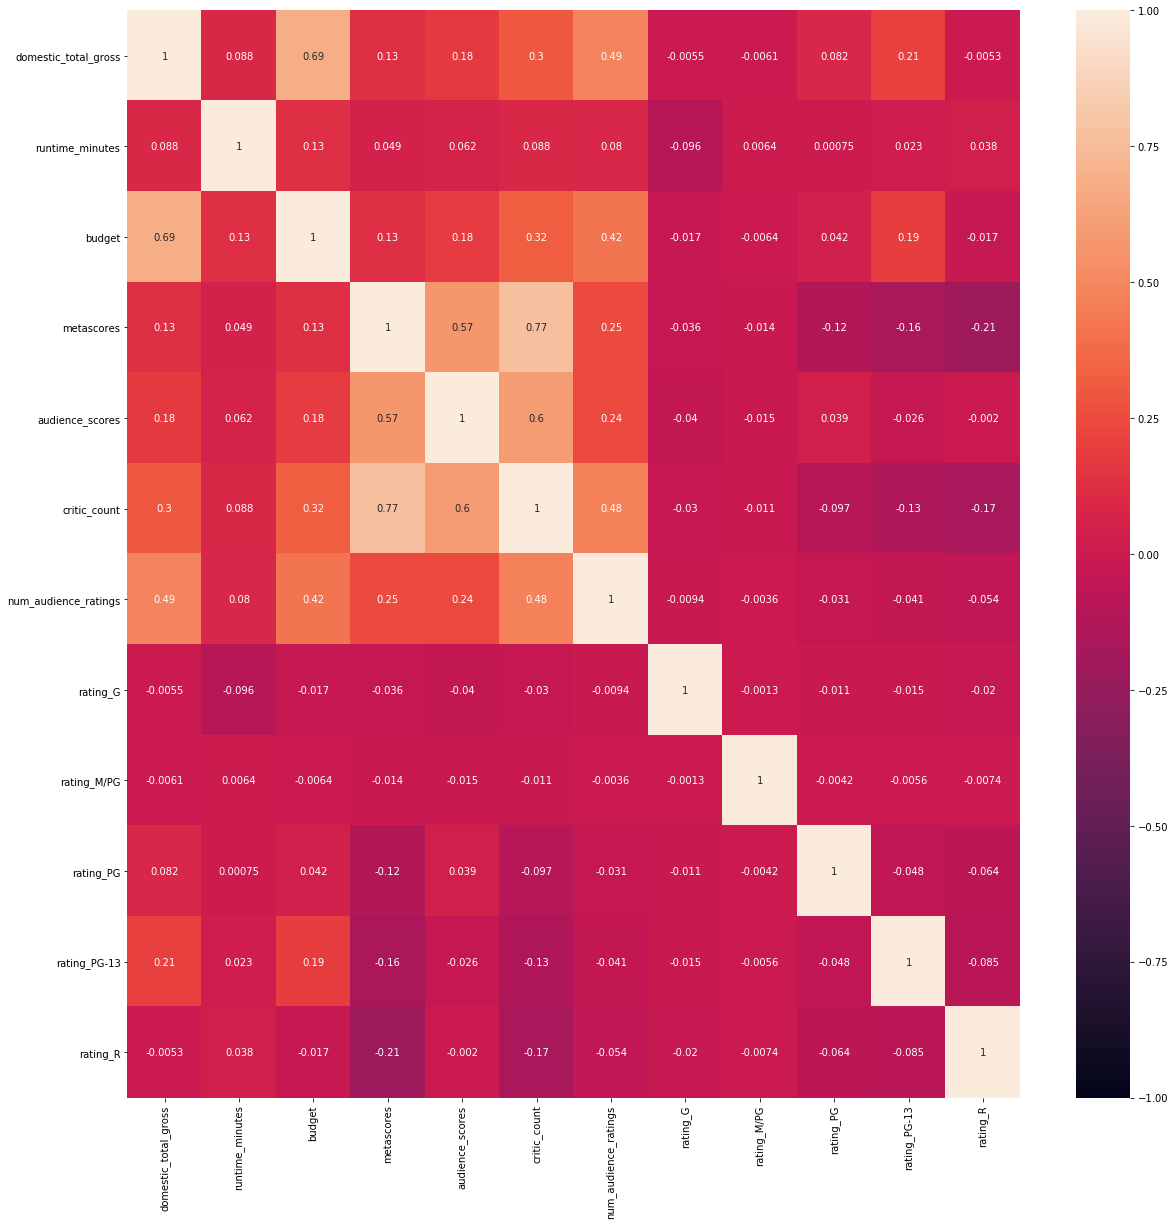

In [10]:
plt.figure(figsize=[20, 20])
sns.heatmap(bdf4.corr(), annot=True, vmin = -1, vmax = 1)

I learned about pickling:

In [11]:
with open('movies_df.pickle', 'wb') as output:
    pickle.dump(bdf4, output)

I also dropped the incomplete rows where the metacritic score wasn't successfully scraped, dropping the number of rows from 2076 to 908.

In [12]:
mdf = bdf4.set_index('movie_title').drop(['runtime_minutes', 'rating_G', 'rating_M/PG', 'rating_PG-13', 'rating_PG', 'rating_R', 'rating'], axis=1)
mdf.reset_index(inplace=True)
m_df = mdf.drop(columns=['movie_title'])
m_df

dropped_noscores = m_df.loc[m_df['metascores'] != 0.0]
dropped_noscores

,domestic_total_gross,budget,metascores,audience_scores,critic_count,num_audience_ratings
908,858373000.0,356000000.0,78.0,7.0,57.0,4763.0
909,543638043.0,260000000.0,88.0,8.0,30.0,768.0
910,434038008.0,200000000.0,84.0,8.0,57.0,691.0
911,477373578.0,150000000.0,64.0,6.0,47.0,458.0
912,426829839.0,160000000.0,64.0,3.0,56.0,5119.0
...,...,...,...,...,...,...
2062,5166.0,0.0,81.0,0.0,10.0,0.0
2063,3816.0,0.0,47.0,4.0,31.0,100.0
2064,1051.0,0.0,68.0,7.0,20.0,5.0
2065,225250.0,0.0,79.0,0.0,14.0,0.0


I performed a log transform to see what would happen --

In [13]:
log_transform = dropped_noscores.transform(lambda x: np.log(x))
log_transform

/home/nick/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,domestic_total_gross,budget,metascores,audience_scores,critic_count,num_audience_ratings
908,20.570549,19.690441,4.356709,1.945910,4.043051,8.468633
909,20.113794,19.376192,4.477337,2.079442,3.401197,6.643790
910,19.888643,19.113828,4.430817,2.079442,4.043051,6.538140
911,19.983810,18.826146,4.158883,1.791759,3.850148,6.126869
912,19.871896,18.890684,4.158883,1.098612,4.025352,8.540714
...,...,...,...,...,...,...
2062,8.549854,-inf,4.394449,-inf,2.302585,-inf
2063,8.246958,-inf,3.850148,1.386294,3.433987,4.605170
2064,6.957497,-inf,4.219508,1.945910,2.995732,1.609438
2065,12.324966,-inf,4.369448,-inf,2.639057,-inf


-- and also an exponential transform.

In [14]:
exp_transform = dropped_noscores.transform(lambda x: np.sqrt(x))
exp_transform

,domestic_total_gross,budget,metascores,audience_scores,critic_count,num_audience_ratings
908,29298.003345,18867.962264,8.831761,2.645751,7.549834,69.014491
909,23316.046899,16124.515497,9.380832,2.828427,5.477226,27.712813
910,20833.578857,14142.135624,9.165151,2.828427,7.549834,26.286879
911,21848.880475,12247.448714,8.000000,2.449490,6.855655,21.400935
912,20659.860576,12649.110641,8.000000,1.732051,7.483315,71.547187
...,...,...,...,...,...,...
2062,71.874891,0.000000,9.000000,0.000000,3.162278,0.000000
2063,61.773781,0.000000,6.855655,2.000000,5.567764,10.000000
2064,32.419130,0.000000,8.246211,2.645751,4.472136,2.236068
2065,474.605099,0.000000,8.888194,0.000000,3.741657,0.000000


Finally, it wouldn't be EDA without a pairplot!

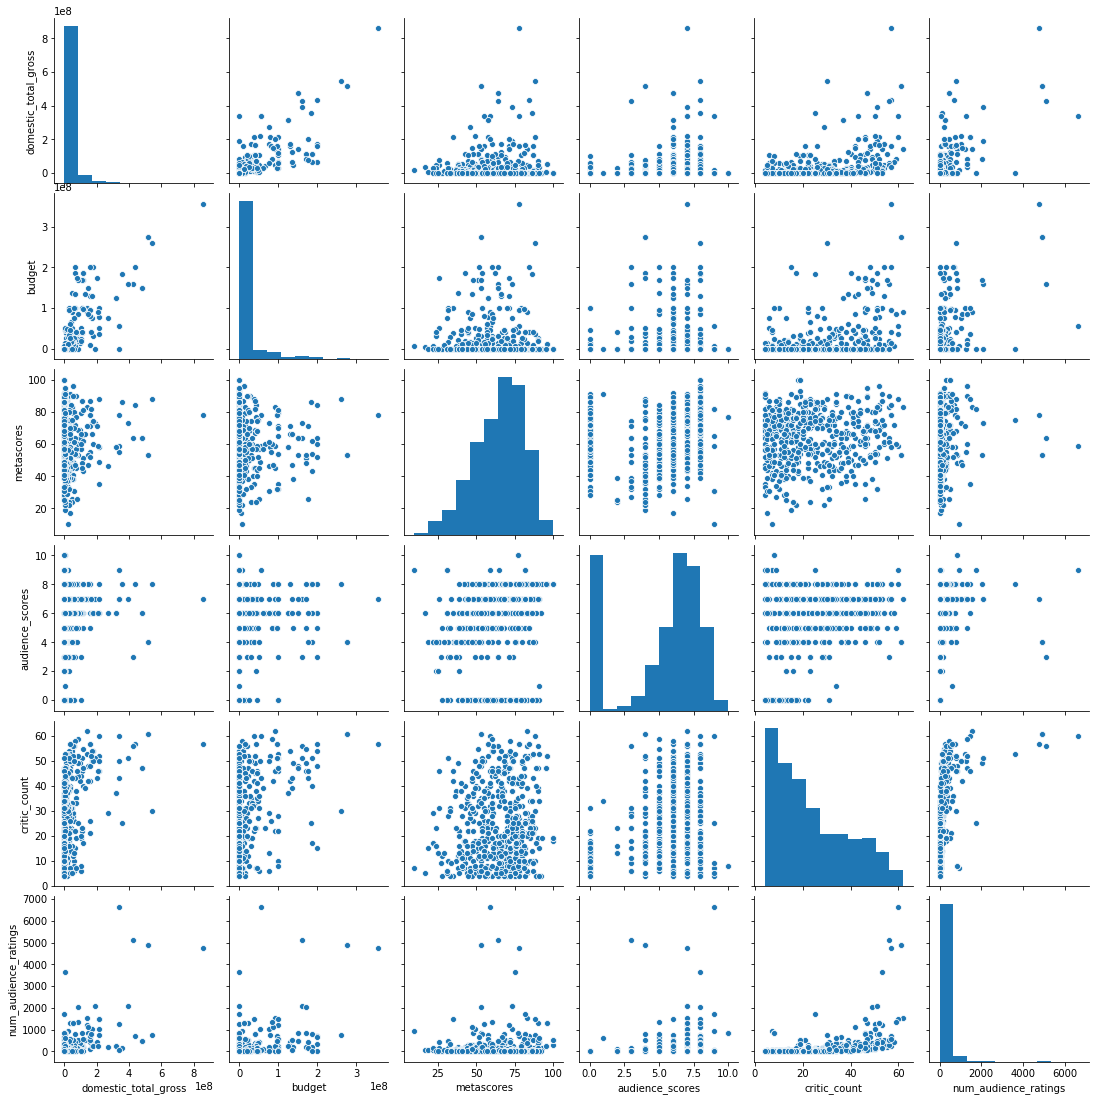

In [15]:
sns.pairplot(dropped_noscores)

Exponential transform pairplot:

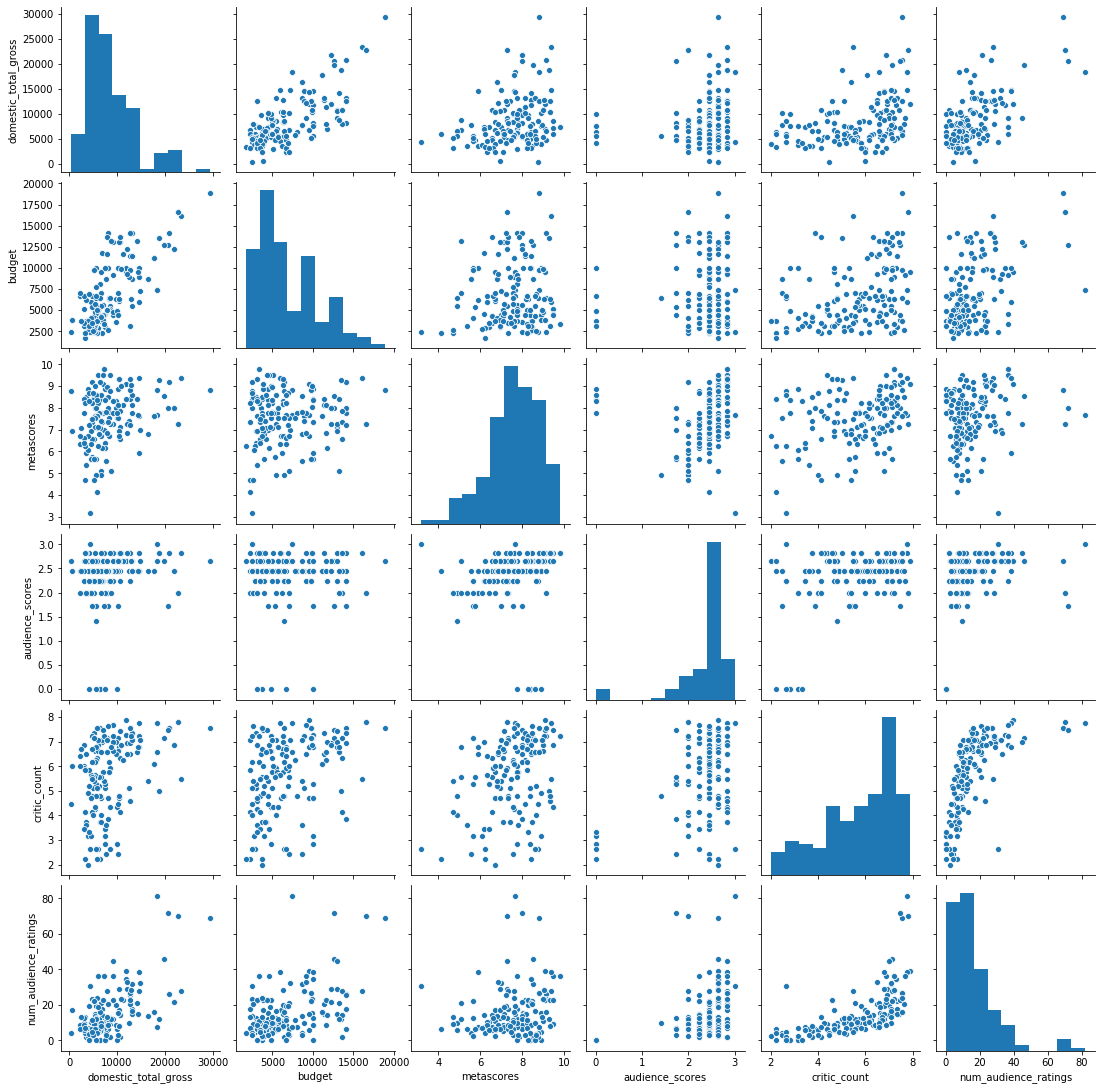

In [27]:
sns.pairplot(exp_transform.loc[exp_transform['budget'] != 0])

And finally, log transform pairplot (massively pared down to 157 rows because the log transform turns some values into -infinity and the pairplot won't accept that):

157

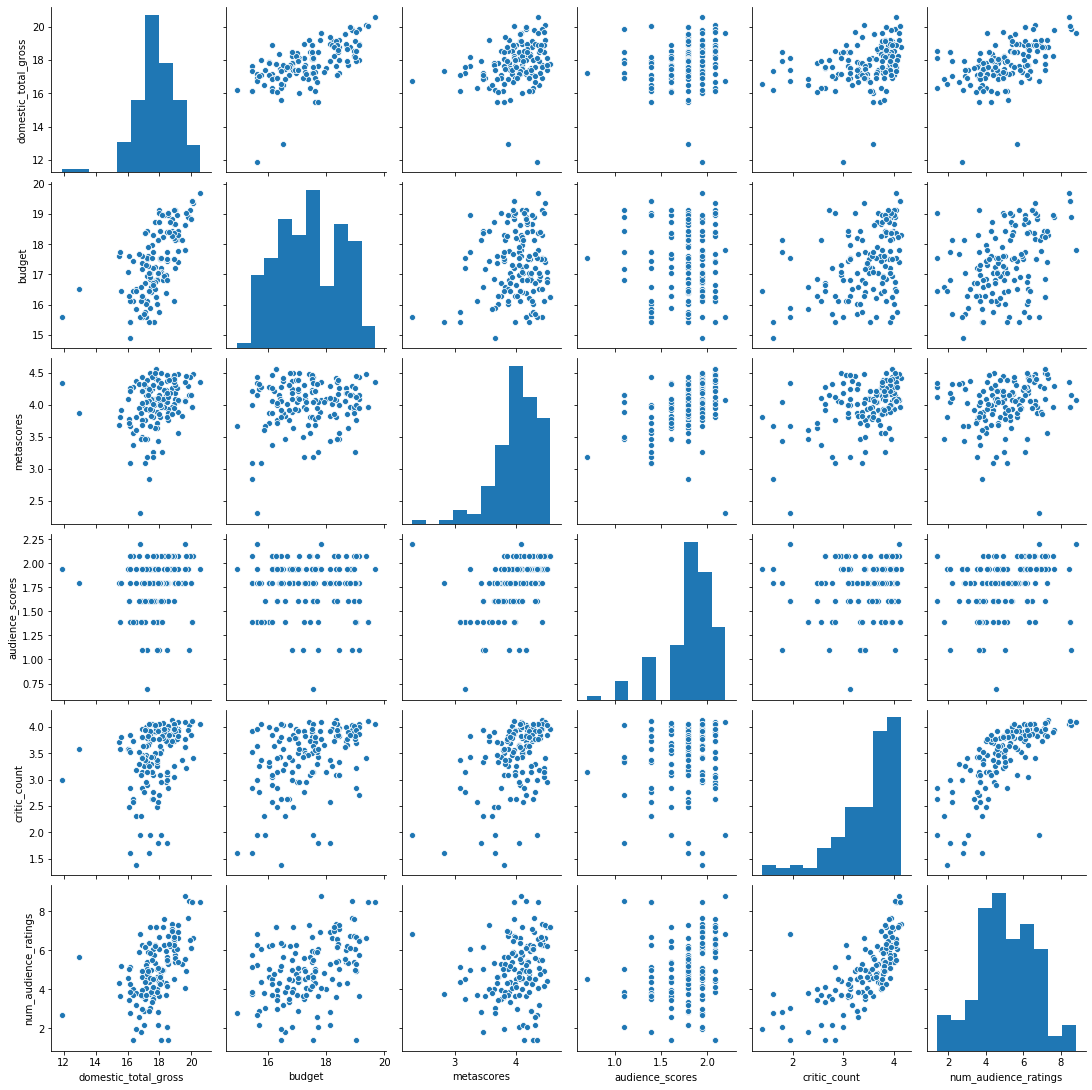

In [46]:
log_trans_pairplot = log_transform.loc[log_transform['metascores'] != float('-inf')]
log_trans_pairplot = log_trans_pairplot.loc[log_transform['audience_scores'] != float('-inf')]
log_trans_pairplot = log_trans_pairplot.loc[log_transform["budget"] != float("-inf")]
log_trans_pairplot = log_trans_pairplot.loc[log_transform['num_audience_ratings'] != float('-inf')]
sns.pairplot(log_trans_pairplot)

## The importance of dropping 'no score' rows

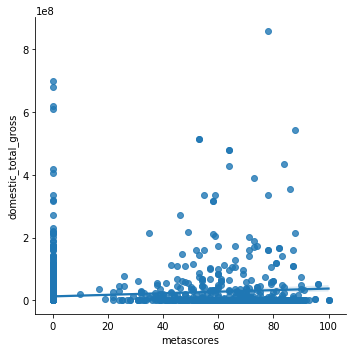

In [16]:
sns.lmplot(x="metascores", y="domestic_total_gross", data=bdf4);

In the above graph, we can see a vertical line at x=0. This is the massive amount (>50%) of the data that did not scrape properly, returning no values from metacritic (Domestic total gross data was scraped from Boxoffice Mojo, which I had no issues scraping data from - that's why we still have that data, but not the review/score data).

It is important to drop these rows so they don't corrupt/skew the data.

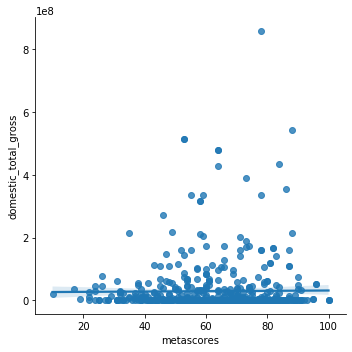

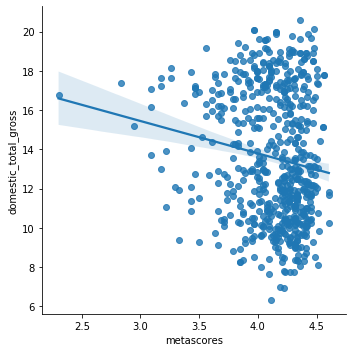

In [17]:
sns.lmplot(x="metascores", y="domestic_total_gross", data=dropped_noscores)
sns.lmplot(x="metascores", y="domestic_total_gross", data=log_transform)

I was surprised at the metascores plot. Metascores were supposed to be my golden goose and predict box office sales, but if anything, they appear to predict them negatively! (in the log transform plot at least, which improves the distribution). However, I might have done something wrong because the un-transformed data does not appear to have a negative correlation. I'm really not sure what happened here. Whatever the case, I decided to pivot to the number of critic reviews as my most important feature (I performed Lasso and Ridge cross validations later on with LARS and discovered that the number of audience ratings was by far the most influential feature).

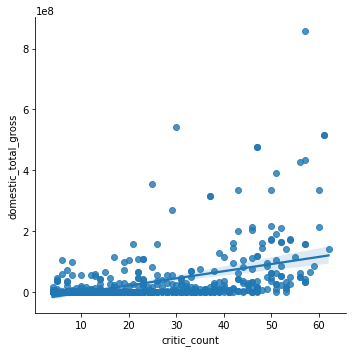

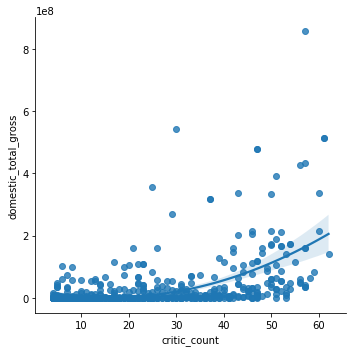

In [18]:
sns.lmplot(x='critic_count', y='domestic_total_gross', data=dropped_noscores)
sns.lmplot(x='critic_count', y='domestic_total_gross', data=dropped_noscores, order=2);

I couldn't decide which of the above looked like a better fit, so in the interest of simplicity and limited time, I chose to view it as a simple linear regression instead of polynomial.

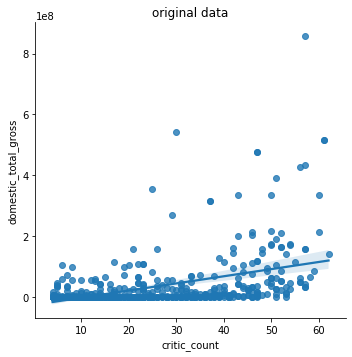

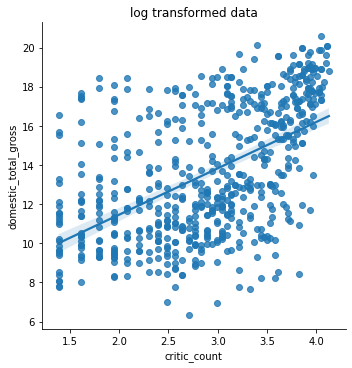

In [19]:
sns.lmplot(x='critic_count', y='domestic_total_gross', data=dropped_noscores)
plt.title('original data');
sns.lmplot(x='critic_count', y='domestic_total_gross', data=log_transform)
plt.title('log transformed data');

The log transform improved the distribution.

--------------------------------

The LARS plot I mentioned a few cells ago:

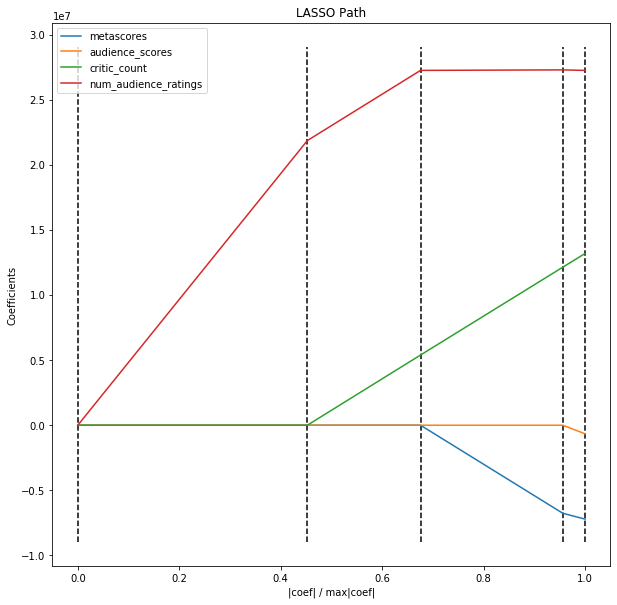

In [20]:
lars_demo.show_graph()